<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/test_pretrainedmodels(2010_2014).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [50]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
file_path = '/content/drive/MyDrive/ar-2010-2014.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65531,18 - 34,NaN,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65532,35-37,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65533,18 - 34,NaN,1,1,1,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Date patient started trying to become pregnant OR date of last pregnancy has : [nan 13. 11. 10. 15. 16. 17. 14. 19. 12. 18. 20.  6.  9.  5.  8.  3.] unique values

Total Number of Previous cycles, Both IVF and DI has : ['2' '3' '0' '5' '>=5' '1' '4'] unique values

Total Number of Previous treatments, Both IVF and DI at clinic has : ['2' '3' '0' '5' '1' '>=5' '4'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total Number of Previous DI cycles has : ['0' '3' '>=5' '1' '2' '4' '5'] unique values

Total number of previous pregnancies, Both IVF and DI has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of DI pregnancies has : [0 1 3 2 4] unique values

Total number of live births - conceived through IVF or DI has : [0 1 2 3 5 4] uni

In [52]:
selected_features = [
    "Patient Age at Treatment",
    "Total Number of Previous IVF cycles",
    "Total number of IVF pregnancies",
    "Total number of live births - conceived through IVF",
    "Type of Infertility - Female Primary",
    "Type of Infertility - Female Secondary",
    "Type of Infertility - Male Primary",
    "Type of Infertility - Male Secondary",
    "Type of Infertility -Couple Primary",
    "Type of Infertility -Couple Secondary",
    "Cause  of Infertility - Tubal disease",
    "Cause of Infertility - Ovulatory Disorder",
    "Cause of Infertility - Male Factor",
    "Cause of Infertility - Patient Unexplained",
    "Cause of Infertility - Endometriosis",
    "Cause of Infertility - Cervical factors",
    "Cause of Infertility - Female Factors",
    "Cause of Infertility - Partner Sperm Concentration",
    "Cause of Infertility -  Partner Sperm Morphology",
    "Causes of Infertility - Partner Sperm Motility",
    "Cause of Infertility -  Partner Sperm Immunological factors",
    "Stimulation used",
    "Egg Source",
    "Sperm From",
    "Fresh Cycle",
    "Frozen Cycle",
    "Eggs Thawed",
    "Fresh Eggs Collected",
    "Eggs Mixed With Partner Sperm",
    "Embryos Transfered",
    "Number of Live Births"
]

# Keep only the selected features
df_selected = data[selected_features]



In [53]:
# Keep only the selected features
df_selected = data[selected_features]




def convert_to_binary_classification(df):
    # Copy the original DataFrame
    df_selected = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    df_selected["Number of Live Births"] = df_selected["Number of Live Births"].apply(lambda x: 1 if x >= 1 else 0)


    return df_selected


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
df_selected = convert_to_binary_classification(df_selected)


# Display the result
print(df_selected["Number of Live Births"])





0        1
1        0
2        1
3        0
4        0
        ..
65530    1
65531    1
65532    0
65533    1
65534    1
Name: Number of Live Births, Length: 65535, dtype: int64


In [ ]:
for col in df_selected:
    print(f"{col} has : {df_selected[col].unique()} unique values\n")

Patient Age at Treatment has : ['18 - 34' '35-37' '38-39' '45-50' '40-42' '43-44' '999'] unique values

Total Number of Previous IVF cycles has : ['0' '1' '4' '2' '5' '3' '>=5'] unique values

Total number of IVF pregnancies has : [0 1 2 3 5 4] unique values

Total number of live births - conceived through IVF has : [0 1 2 4 3] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [0 1] unique values

Cause

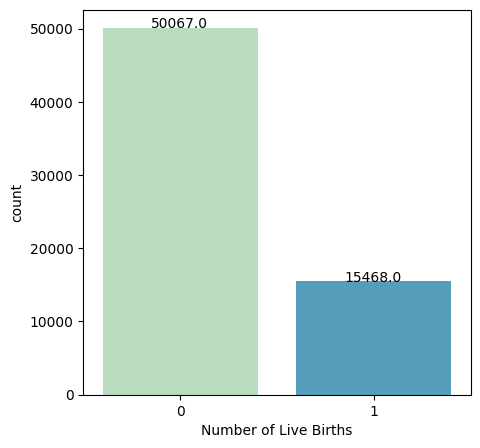

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df_selected["Number of Live Births"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 75.19 % of the dataset
Live birth occurrence 24.81 % of the dataset


In [54]:
df_selected.rename(columns={"Number of Live Births": "Live birth occurrence"}, inplace=True)


In [55]:
# Delete rows with Patient Age at Treatment = 999
df = df_selected[df_selected["Patient Age at Treatment"] != '999']


In [56]:
def convert_age_range(age_range):
    if age_range == "18 - 34":
        return 0
    elif age_range ==  "35-37":
        return 1
    elif age_range == "38-39":
        return 2
    elif age_range == "40-42":
        return 3
    elif age_range ==  "43-44":
        return 4
    elif age_range ==  "45-50":
        return 5
    else:
        return None


In [57]:
# Assume `df` is your DataFrame with the "Age Range" column

# Apply the conversion function to the "Age Range" column
df["Patient Age at Treatment"] = df["Patient Age at Treatment"].apply(convert_age_range).astype('Int64')



In [ ]:
for col in df:
    print(f"{col} has : {df[col].unique()} unique values\n")

Patient Age at Treatment has : <IntegerArray>
[0, 1, 2, 5, 3, 4]
Length: 6, dtype: Int64 unique values

Total Number of Previous IVF cycles has : ['0' '1' '4' '2' '5' '3' '>=5'] unique values

Total number of IVF pregnancies has : [0 1 2 3 5 4] unique values

Total number of live births - conceived through IVF has : [0 1 2 4 3] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [0 1] unique values

Cause

In [ ]:
df.isnull().sum()


Patient Age at Treatment                                       0
Total Number of Previous IVF cycles                            0
Total number of IVF pregnancies                                0
Total number of live births - conceived through IVF            0
Type of Infertility - Female Primary                           0
Type of Infertility - Female Secondary                         0
Type of Infertility - Male Primary                             0
Type of Infertility - Male Secondary                           0
Type of Infertility -Couple Primary                            0
Type of Infertility -Couple Secondary                          0
Cause  of Infertility - Tubal disease                          0
Cause of Infertility - Ovulatory Disorder                      0
Cause of Infertility - Male Factor                             0
Cause of Infertility - Patient Unexplained                     0
Cause of Infertility - Endometriosis                           0
Cause of Infertility - Ce

In [58]:
# Drop rows with NaN values
df.dropna(inplace=True)




In [ ]:
#X = df.loc[:, df.columns != 'Live birth occurrence']
#X = X.apply(pd.to_numeric, errors='coerce')
#df1=X.fillna(X.median())


In [ ]:
#Y = df['Live birth occurrence']

In [ ]:
#df=pd.concat([df1, Y], axis=1, join='inner')


In [59]:
df.loc[df['Total Number of Previous IVF cycles'] == '>=5', 'Total Number of Previous IVF cycles'] = 6
df['Total Number of Previous IVF cycles'] = df['Total Number of Previous IVF cycles'].astype(int)


In [60]:
df.loc[df['Fresh Eggs Collected'] == '> 50', 'Fresh Eggs Collected'] = 60
df['Fresh Eggs Collected'] = df['Fresh Eggs Collected'].astype(int)

In [61]:
df.loc[df['Eggs Mixed With Partner Sperm'] == '> 50', 'Eggs Mixed With Partner Sperm'] = 60
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].astype(int)

In [62]:
df.loc[df['Total number of IVF pregnancies'] == '>=5', 'Total number of IVF pregnancies'] = 6
df['Total number of IVF pregnancies'] = df['Total number of IVF pregnancies'].astype(int)


In [63]:
df=df.drop(['Egg Source','Sperm From','Cause of Infertility -  Partner Sperm Immunological factors','Stimulation used'], axis=1)

In [64]:
df=df.drop(['Cause of Infertility - Female Factors'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64442 entries, 0 to 65534
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Patient Age at Treatment                             64442 non-null  Int64
 1   Total Number of Previous IVF cycles                  64442 non-null  int64
 2   Total number of IVF pregnancies                      64442 non-null  int64
 3   Total number of live births - conceived through IVF  64442 non-null  int64
 4   Type of Infertility - Female Primary                 64442 non-null  int64
 5   Type of Infertility - Female Secondary               64442 non-null  int64
 6   Type of Infertility - Male Primary                   64442 non-null  int64
 7   Type of Infertility - Male Secondary                 64442 non-null  int64
 8   Type of Infertility -Couple Primary                  64442 non-null  int64
 9   Type o

In [ ]:
shape = df.shape


In [ ]:
shape

(64442, 26)

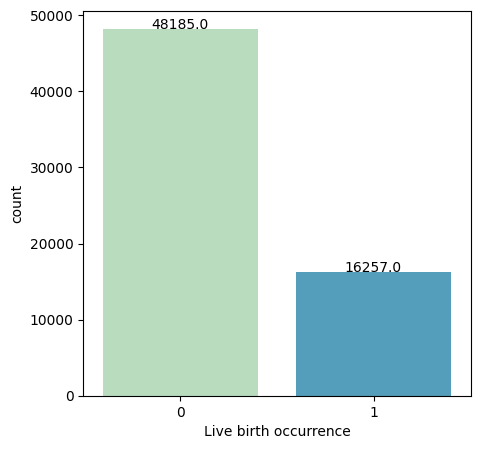

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#Scale Data

#Test pretrained model

In [65]:
from keras.models import load_model

# Load the saved model
pretrained_model = load_model('/content/drive/MyDrive/my_model2.h5')


In [66]:
selected_samples = df[:100]



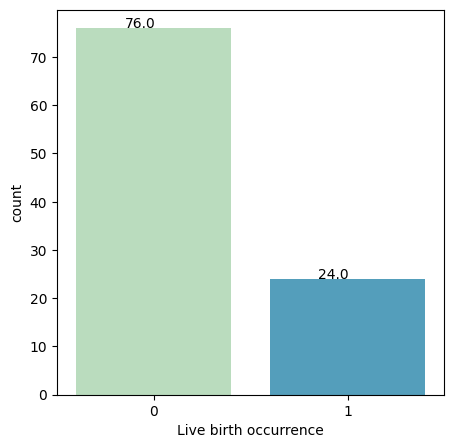

In [67]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = selected_samples["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [68]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = selected_samples[selected_samples['Live birth occurrence'] == 0]
df_minority = selected_samples[selected_samples['Live birth occurrence'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Set to False for undersampling
                                   n_samples=24,  # Specify the desired number of samples
                                   random_state=42)  # Set a random state for reproducibility

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame if needed
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [69]:
X = df_downsampled.drop(['Live birth occurrence'], axis=1)
Y = df_downsampled['Live birth occurrence']

In [70]:
from sklearn.preprocessing import StandardScaler

# Select the columns from the DataFrame
cols = X.columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [74]:
# split the dataset
SEED=23
X_new_train, X_new_test, y_new_train, Y_new_test = train_test_split(X, Y, test_size=0.2,shuffle=True, stratify=Y, random_state=SEED)
#With random_state=0 , we get the same train and test sets across different executions


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Concatenate
from keras.optimizers import Adam
from keras import Model



# Freeze initial layers of the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Create the new model
new_input = Input(shape=(25,))
pretrained_output = pretrained_model(new_input)

# Create new trainable layers for the new variables
new_variables = Dense(64, activation='relu')(new_input)
new_variables = Dense(32, activation='relu')(new_variables)

# Flatten the output of the pretrained model
flattened_output = Flatten()(pretrained_output)

# Combine the flattened pretrained features and new variables
combined_features = Concatenate()([flattened_output, new_variables])

# Add new trainable layers on top
output = Dense(1, activation='sigmoid')(combined_features)

# Create the final model
model = Model(inputs=[new_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the new dataset
model.fit(X_new_train, y_new_train, epochs=10, batch_size=32, validation_data=(X_new_test, Y_new_test))


Epoch 1/10
2/2 [==============================] - 1s 209ms/step - loss: 0.7100 - accuracy: 0.4737 - val_loss: 0.6743 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 30ms/step - loss: 0.6869 - accuracy: 0.4737 - val_loss: 0.6736 - val_accuracy: 0.7000
Epoch 3/10
2/2 [==============================] - 0s 29ms/step - loss: 0.6665 - accuracy: 0.5000 - val_loss: 0.6719 - val_accuracy: 0.7000
Epoch 4/10
2/2 [==============================] - 0s 29ms/step - loss: 0.6499 - accuracy: 0.6316 - val_loss: 0.6719 - val_accuracy: 0.7000
Epoch 5/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6359 - accuracy: 0.7368 - val_loss: 0.6720 - val_accuracy: 0.7000
Epoch 6/10
2/2 [==============================] - 0s 33ms/step - loss: 0.6208 - accuracy: 0.7895 - val_loss: 0.6726 - val_accuracy: 0.7000
Epoch 7/10
2/2 [==============================] - 0s 28ms/step - loss: 0.6076 - accuracy: 0.7895 - val_loss: 0.6733 - val_accuracy: 0.7000
Epoch 8/10
2/2 [==========

In [76]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = model.predict(X_new_test)
auc = roc_auc_score(Y_new_test, y_pred)

print("AUC:", auc)

1/1 [==============================] - 0s 77ms/step
AUC: 0.6800000000000002


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions and true labels for the validation set
y_pred = model.predict(X_new_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(Y_new_test, y_pred_binary)
recall = recall_score(Y_new_test, y_pred_binary)
f1 = f1_score(Y_new_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 [==============================] - 0s 120ms/step
Precision: 0.75
Recall: 0.6
F1 Score: 0.6666666666666665


#//////////////////////////

#Test the pretained model 4

In [ ]:
import joblib

# Load the pretrained model from the file
clf = joblib.load('/content/drive/MyDrive/pretrained_model4.pkl')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Feature extraction using random forest
features = clf.apply(X_new_train)

# Train a new random forest classifier on the extracted features
new_clf = RandomForestClassifier(n_estimators=100, random_state=42)
new_clf.fit(features, y_new_train)

# Extract features from the test set
test_features = clf.apply(X_new_test)

# Predict using the trained random forest model on extracted features
prediction = new_clf.predict(test_features)

# Evaluate the accuracy of the new random forest model on the extracted features
accuracy = np.mean(prediction == Y_new_test)
print("Accuracy on extracted features:", accuracy)

Accuracy on extracted features: 0.4
